In [1]:
import re
import numpy as np

In [2]:
with open('anna.txt') as f:
    anna = f.read()

In [3]:
with open('sonets.txt') as f:
    sonets = f.read()

In [5]:
anna_sen = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sen = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)

In [6]:
len(anna_sen), len(sonet_sen)

(21499, 1378)

длина предложения в буквах,
число различных букв в предложении,
число гласных в предложении,
медиана числа букв в слове - различных букв? или просто медиана 
медиана числа гласных в слове.

In [106]:
ru_vowels = set(['а', 'о', 'э', 'и', 'у', 'ы', 'е', 'ё', 'ю', 'я'])
ru_vowels

{'а', 'е', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я', 'ё'}

In [51]:
def count_letters(string):
    letters = [symb.lower() for symb in list(string) if symb.isalpha() is True]
    return len(set(letters))

In [52]:
def count_vowels(string):
    vowels = [symb.lower() for symb in list(string) if symb.lower() in ru_vowels]
    return(len(vowels))

In [108]:
anna_data = [(1, len(sent), count_letters(sent), count_vowels(sent), 
              np.median([count_letters(word) for word in sent.split()]),
              np.median([count_vowels(word) for word in sent.split()])
             ) for sent in anna_sen if len(sent) > 0 and len(sent.split()) > 0]

In [109]:
sonet_data = [(2, len(sent), count_letters(sent), count_vowels(sent), 
              np.median([count_letters(word) for word in sent.split()]),
              np.median([count_vowels(word) for word in sent.split()])
             ) for sent in sonet_sen if len(sent) > 0 and len(sent.split()) > 0]

In [62]:
len(anna_data), len(sonet_data)

(21233, 1360)

In [110]:
anna_data = np.array(anna_data)
sonet_data = np.array(sonet_data)

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt

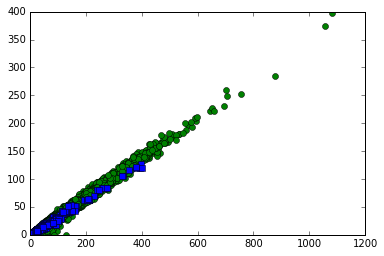

In [111]:
plt.figure()
plt.plot(anna_data[:,1], anna_data[:,3], 'og',
        sonet_data[:,1], sonet_data[:,3], 'sb')
plt.show()

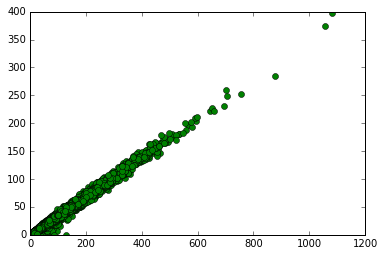

In [112]:
plt.figure()
plt.plot(anna_data[:,1], anna_data[:,3], 'og')
plt.show()

In [96]:
from sklearn import grid_search, svm

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [113]:
data = np.vstack((anna_data, sonet_data))

In [115]:
data[:, 0]

array([ 1.,  1.,  1., ...,  2.,  2.,  2.])

In [116]:
parameters = {'C': (.1, .5, 1.0, 1.5, 1.7, 2.0)}
gs = grid_search.GridSearchCV(svm.LinearSVC(), parameters)
gs.fit(data[:, 1:], data[:, 0])
print('Best result is ', gs.best_score_)
print('Best C is', gs.best_estimator_.C)

Best result is  0.9398043641835967
Best C is 0.5


In [117]:
clf = svm.LinearSVC(C=gs.best_estimator_.C)
clf.fit(data[::2, 1:], data[::2, 0])

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [125]:
wrong = 0
for obj in data[1::2, :]:
    label = clf.predict(obj[1:].reshape(1,-1))
    if label != obj[0] and wrong < 3:
        print('Пример ошибки: class = ', obj[0], ', label = ', label, ', экземпляр ', obj[1:])
        wrong += 1
    if wrong > 3:
        break

Пример ошибки: class =  2.0 , label =  [ 1.] , экземпляр  [ 58.  22.  21.   4.   1.]
Пример ошибки: class =  2.0 , label =  [ 1.] , экземпляр  [ 133.   26.   42.    4.    2.]
Пример ошибки: class =  2.0 , label =  [ 1.] , экземпляр  [ 61.  23.  20.   5.   3.]
